In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/5_train.zip','r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/cats_and_dogs_images')

In [ ]:
files_list=os.listdir('/content/drive/MyDrive/cats_and_dogs_images/train')

In [ ]:

num_files=len(files_list)

In [ ]:
print(num_files)

25000


In [ ]:

import os,shutil,pathlib
original_dir=pathlib.Path(r'/content/drive/MyDrive/cats_and_dogs_images/train')
new_base_dir=pathlib.Path(r'/content/drive/MyDrive/image_seggrated')


def make_subset(subset_name,start_index,end_index):
  for category in('cat','dog'):
    dir=new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames=[f'{category}.{i}.jpg' for i in range(start_index,end_index)]
    for fname in fnames:
        shutil.copyfile(src=original_dir/fname,dst=dir/fname)

make_subset('train',start_index=0,end_index=1000)
make_subset('validation',start_index=1000,end_index=1500)
make_subset('test',start_index=1500,end_index=2500)

In [ ]:
import cv2
import numpy as np
import os
labels=['cat','dog']
img_size=224
def get_data(data_dir):
    images=[]
    image_labels=[]
    for label in labels:
        path=os.path.join(data_dir,label)
        class_num=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img))[...,::-1]
                resized_arr=cv2.resize(img_arr,(img_size,img_size))
                images.append(resized_arr)
                image_labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img} : {e}")
    return np.array(images),np.array(image_labels)

In [ ]:
train_images,train_labels=get_data('/content/drive/MyDrive/image_seggrated/train')
val_images,val_labels=get_data('/content/drive/MyDrive/image_seggrated/validation')

In [ ]:
train_images[0].shape

(224, 224, 3)

In [ ]:
train_images.shape

(2000, 224, 224, 3)

In [ ]:
val_images.shape

(1000, 224, 224, 3)

In [ ]:
val_labels.shape

(1000,)

In [ ]:
train_labels.shape

(2000,)

In [ ]:
np.unique(train_labels)

array([0, 1])

In [ ]:

x_train=np.array(train_images).astype('float32')/255
x_val=np.array(val_images).astype('float32')/255

In [ ]:
y_train=np.array(train_labels)
y_val=np.array(val_labels)

In [ ]:
len(x_train)

2000

In [ ]:
x_train.shape

(2000, 224, 224, 3)

In [ ]:

train_datagen=ImageDataGenerator(rotation_range=20,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator()
train_generator=train_datagen.flow(x_train,y_train,batch_size=32)
val_generator=val_datagen.flow(x_val,y_val,batch_size=32)

In [ ]:
#VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_base=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg_base.layers:
  layer.trainable=False
vg_model=Sequential()
vg_model.add(vgg_base)
vg_model.add(Flatten())
vg_model.add(Dense(128,activation='relu'))
vg_model.add(Dropout(0.2))
vg_model.add(Dense(64,activation='relu'))
vg_model.add(Dense(1,activation='sigmoid'))


In [ ]:
vg_model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=vg_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 552ms/step - accuracy: 0.9533 - loss: 0.1231 - val_accuracy: 0.8990 - val_loss: 0.2976
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 523ms/step - accuracy: 0.9160 - loss: 0.1958 - val_accuracy: 0.9170 - val_loss: 0.1916
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.9416 - loss: 0.1268 - val_accuracy: 0.9210 - val_loss: 0.2129
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 503ms/step - accuracy: 0.9434 - loss: 0.1473 - val_accuracy: 0.9160 - val_loss: 0.1987
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.9518 - loss: 0.1192 - val_accuracy: 0.9230 - val_loss: 0.1958
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 592ms/step - accuracy: 0.9499 - loss: 0.1164 - val_accuracy: 0.9280 - val_loss: 0.1969
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 572ms/step - accuracy: 0.9497 - loss: 0.1138 - val_accuracy: 0.9230 - val_loss: 0.2058
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.9382 - loss: 0.1579 - val_accu

In [ ]:
vg_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,373,829 (92.98 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,439,428 (24.56 MB)

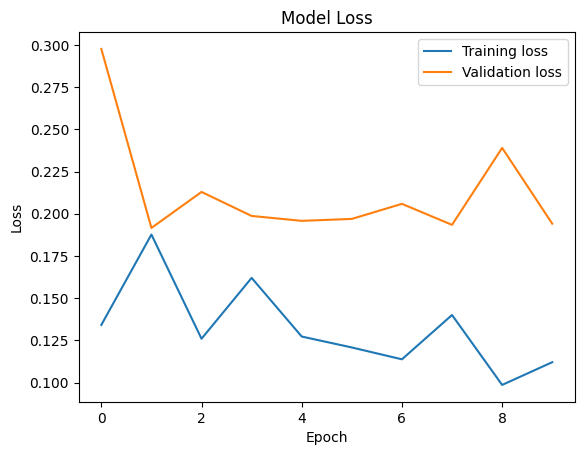

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label='Training loss')
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

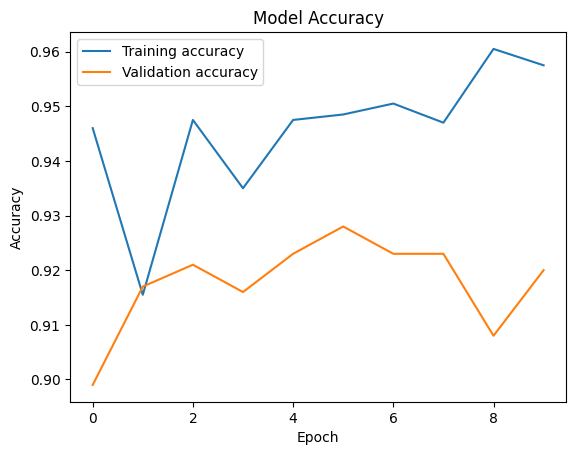

In [ ]:
plt.plot(history1.history['accuracy'],label='Training accuracy')
plt.plot(history1.history['val_accuracy'],label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense


resnet_base=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))


for layer in resnet_base.layers:
  layer.trainable=False


res_model=Sequential()
res_model.add(resnet_base)
res_model.add(GlobalAveragePooling2D())
res_model.add(Dropout(0.4))
res_model.add(Dense(32,activation='relu'))
res_model.add(Dropout(0.3))
res_model.add(Dense(64,activation='relu'))
res_model.add(Dropout(0.3))
res_model.add(Dense(128,activation='relu'))
res_model.add(Dropout(0.3))
res_model.add(Dense(256,activation='relu'))
res_model.add(Dropout(0.3))
res_model.add(Dense(1,activation='sigmoid'))


res_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,696,993 (90.40 MB)

 Trainable params: 109,281 (426.88 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
res_model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history2=res_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 654ms/step - accuracy: 0.4847 - loss: 0.7136 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 435ms/step - accuracy: 0.4690 - loss: 0.7028 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 450ms/step - accuracy: 0.4906 - loss: 0.6940 - val_accuracy: 0.5110 - val_loss: 0.6919
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.5086 - loss: 0.6924 - val_accuracy: 0.6020 - val_loss: 0.6884
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.5193 - loss: 0.6932 - val_accuracy: 0.6060 - val_loss: 0.6856
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 423ms/step - accuracy: 0.5066 - loss: 0.6946 - val_accuracy: 0.5090 - val_loss: 0.6923
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step - accuracy: 0.5201 - loss: 0.6927 - val_accuracy: 0.5950 - val_loss: 0.6860
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.5192 - loss: 0.6923 - val_accu

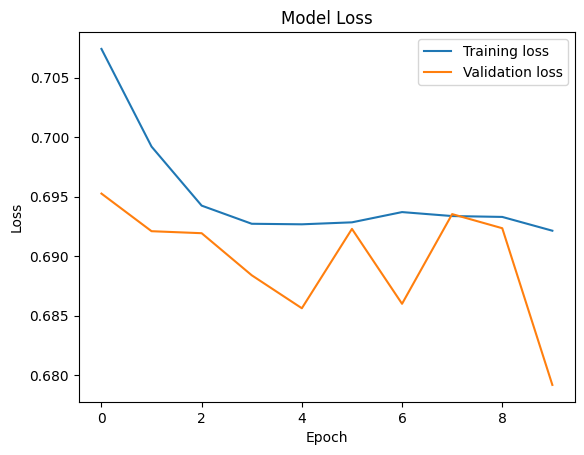

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'],label='Training loss')
plt.plot(history2.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

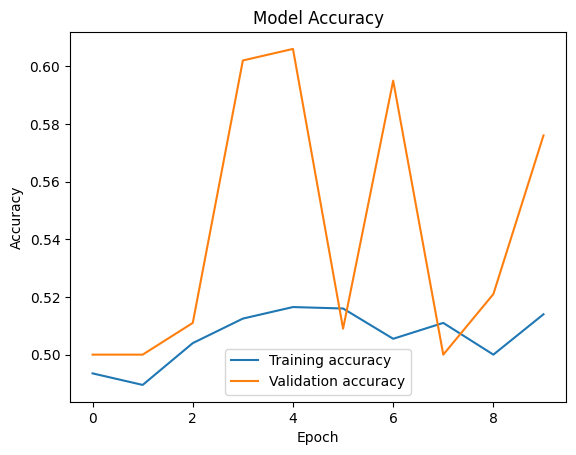

In [ ]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

mobilenet_base=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))


for layer in mobilenet_base.layers:
  layer.trainable=False


mobile_model=Sequential()
mobile_model.add(mobilenet_base)
mobile_model.add(GlobalAveragePooling2D())
mobile_model.add(Dense(200,activation='relu'))
mobile_model.add(Dropout(0.25))
mobile_model.add(Dense(50,activation='relu'))
mobile_model.add(Dropout(0.25))

mobile_model.add(Dense(1,activation='sigmoid'))

mobile_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 200)            │       256,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,524,285 (9.63 MB)

 Trainable params: 266,301 (1.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
mobile_model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history3=mobile_model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 561ms/step - accuracy: 0.8988 - loss: 0.2263 - val_accuracy: 0.9710 - val_loss: 0.0797
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.9625 - loss: 0.0930 - val_accuracy: 0.9760 - val_loss: 0.0518
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 380ms/step - accuracy: 0.9718 - loss: 0.0751 - val_accuracy: 0.9760 - val_loss: 0.0447
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 369ms/step - accuracy: 0.9764 - loss: 0.0598 - val_accuracy: 0.9800 - val_loss: 0.0455
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 383ms/step - accuracy: 0.9787 - loss: 0.0515 - val_accuracy: 0.9820 - val_loss: 0.0423
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.9774 - loss: 0.0570 - val_accuracy: 0.9800 - val_loss: 0.0476
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.9817 - loss: 0.0470 - val_accuracy: 0.9810 - val_loss: 0.0434
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 410ms/step - accuracy: 0.9884 - loss: 0.0371 - val_accu

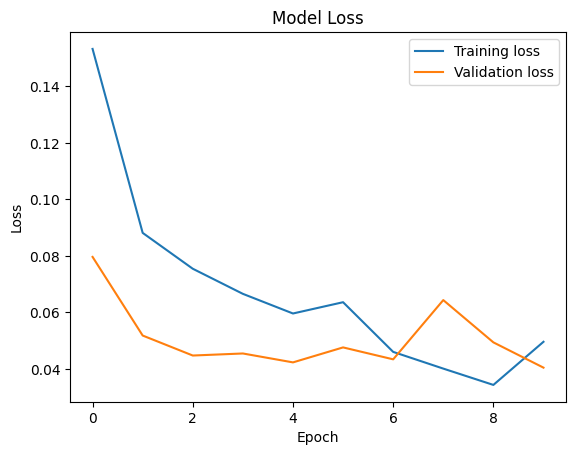

In [ ]:
plt.plot(history3.history['loss'],label='Training loss')
plt.plot(history3.history['val_loss'],label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

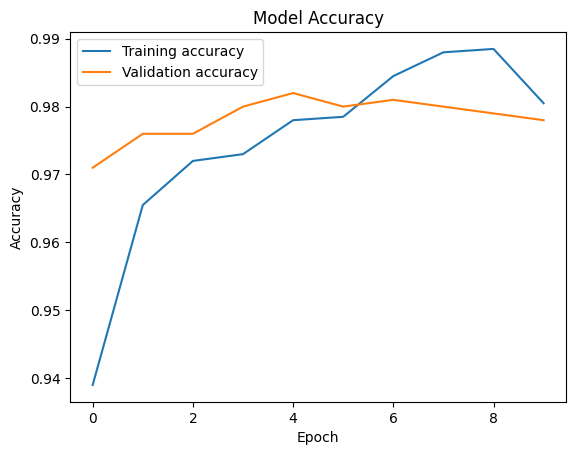

In [ ]:
plt.plot(history3.history['accuracy'],label='Training accuracy')
plt.plot(history3.history['val_accuracy'],label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()